In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [61]:
sin = np.linspace(0, 4* np.pi, 200)
sin = np.sin(sin)
sin

array([ 0.00000000e+00,  6.31056313e-02,  1.25959705e-01,  1.88311666e-01,
        2.49912962e-01,  3.10518032e-01,  3.69885285e-01,  4.27778068e-01,
        4.83965601e-01,  5.38223906e-01,  5.90336692e-01,  6.40096223e-01,
        6.87304143e-01,  7.31772266e-01,  7.73323331e-01,  8.11791702e-01,
        8.47024034e-01,  8.78879879e-01,  9.07232251e-01,  9.31968129e-01,
        9.52988909e-01,  9.70210796e-01,  9.83565137e-01,  9.92998700e-01,
        9.98473878e-01,  9.99968847e-01,  9.97477646e-01,  9.91010207e-01,
        9.80592311e-01,  9.66265486e-01,  9.48086844e-01,  9.26128849e-01,
        9.00479032e-01,  8.71239643e-01,  8.38527236e-01,  8.02472214e-01,
        7.63218303e-01,  7.20921979e-01,  6.75751849e-01,  6.27887973e-01,
        5.77521152e-01,  5.24852163e-01,  4.70090958e-01,  4.13455834e-01,
        3.55172553e-01,  2.95473450e-01,  2.34596503e-01,  1.72784385e-01,
        1.10283499e-01,  4.73429900e-02, -1.57862420e-02, -7.88525454e-02,
       -1.41604519e-01, -

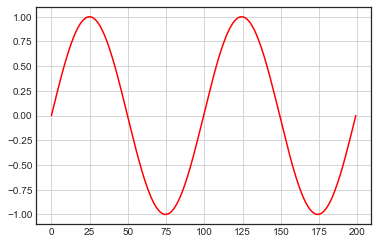

In [62]:
plt.plot(sin, 'r')
plt.grid()
plt.show()

In [63]:
x_train = []
y_train = np.zeros(len(sin) - 3)
for i in range(len(sin) - 3):
    x_train.append(sin[i:i+3])
    y_train[i] = sin[i+3]

y_train

array([ 1.88311666e-01,  2.49912962e-01,  3.10518032e-01,  3.69885285e-01,
        4.27778068e-01,  4.83965601e-01,  5.38223906e-01,  5.90336692e-01,
        6.40096223e-01,  6.87304143e-01,  7.31772266e-01,  7.73323331e-01,
        8.11791702e-01,  8.47024034e-01,  8.78879879e-01,  9.07232251e-01,
        9.31968129e-01,  9.52988909e-01,  9.70210796e-01,  9.83565137e-01,
        9.92998700e-01,  9.98473878e-01,  9.99968847e-01,  9.97477646e-01,
        9.91010207e-01,  9.80592311e-01,  9.66265486e-01,  9.48086844e-01,
        9.26128849e-01,  9.00479032e-01,  8.71239643e-01,  8.38527236e-01,
        8.02472214e-01,  7.63218303e-01,  7.20921979e-01,  6.75751849e-01,
        6.27887973e-01,  5.77521152e-01,  5.24852163e-01,  4.70090958e-01,
        4.13455834e-01,  3.55172553e-01,  2.95473450e-01,  2.34596503e-01,
        1.72784385e-01,  1.10283499e-01,  4.73429900e-02, -1.57862420e-02,
       -7.88525454e-02, -1.41604519e-01, -2.03792016e-01, -2.65167138e-01,
       -3.25485227e-01, -

In [64]:
x_train = np.array(x_train).reshape(-1, 3, 1)
x_train.shape

(197, 3, 1)

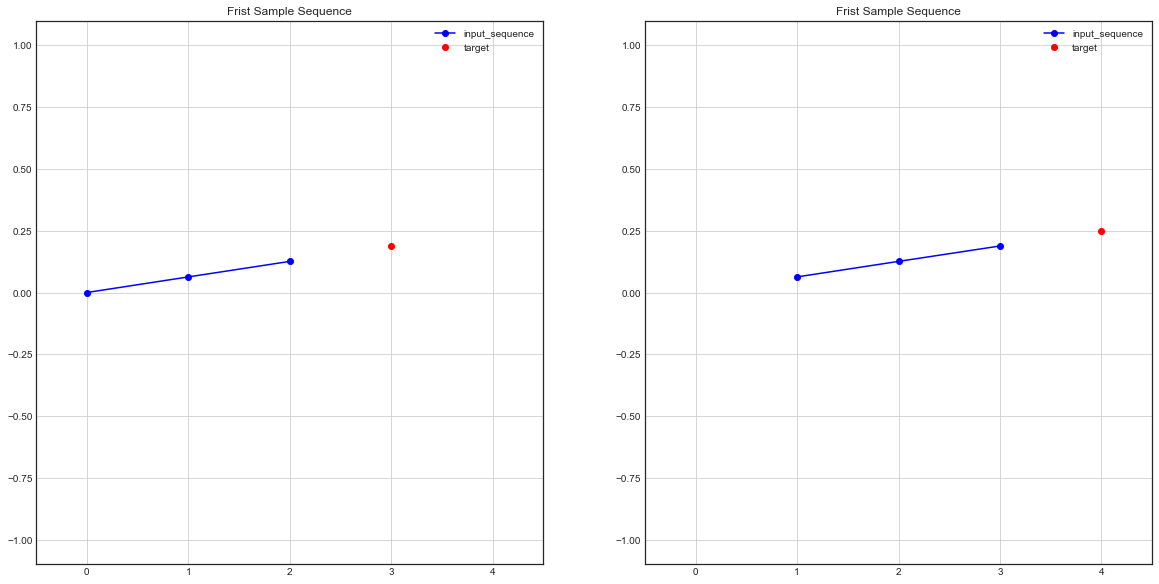

In [65]:
plt.figure(figsize = (20, 10))

plt.subplot(1, 2, 1)
plt.plot([0, 1, 2], x_train[0].flatten(), 'bo-', label = 'input_sequence')
plt.plot([3], y_train[0], 'ro', label = 'target')
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title('Frist Sample Sequence')

plt.subplot(1, 2, 2)
plt.plot([1, 2, 3], x_train[1].flatten(), 'bo-', label = 'input_sequence')
plt.plot([4], y_train[1], 'ro', label = 'target')
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title('Frist Sample Sequence')

plt.show()

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, SimpleRNN

In [67]:
model = Sequential([ 
    SimpleRNN(10, input_shape=x_train.shape[1:], activation='tanh'),
    Dense(1, activation='linear')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 10)                120       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(optimizer = 'adam',
             loss = 'mse')

### Before Model Train 

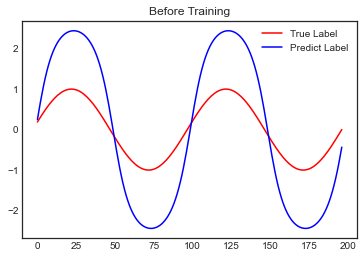

In [69]:
plt.plot(y_train, 'r', label = 'True Label')
plt.plot(model.predict(x_train[:, :, :]), 'b', label = 'Predict Label')
plt.legend()
plt.title('Before Training')
plt.show()

In [70]:
hist = model.fit(x_train, y_train, epochs = 100, verbose = 0)

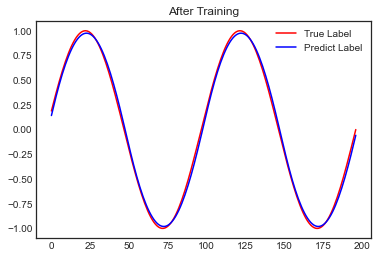

In [71]:
plt.plot(y_train, 'r', label = 'True Label')
plt.plot(model.predict(x_train[:, :, :]), 'b', label = 'Predict Label')
plt.legend()
plt.title('After Training')
plt.show()

In [72]:
hist.history.keys()

dict_keys(['loss'])

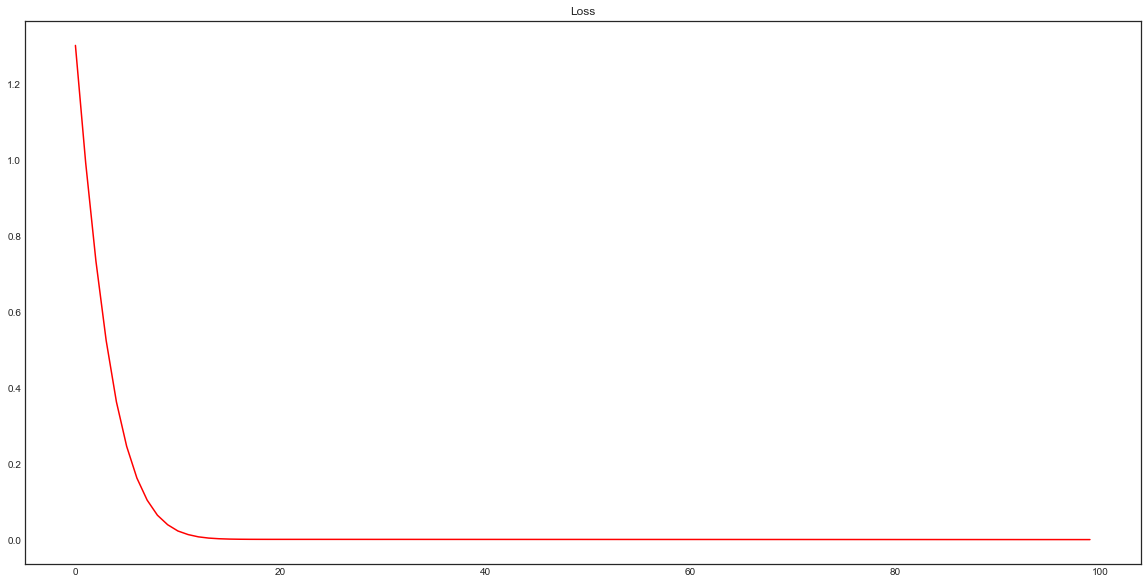

In [75]:
plt.figure(figsize = (20, 10))

plt.plot(hist.history['loss'], 'r')
plt.title('Loss')
plt.show()